In [127]:
# !pip install -U deep_translator

In [1]:
import pandas as pd
import requests
import numpy as np
from bs4 import BeautifulSoup
from pprint import pprint
import re
from random import seed
from random import random
from random import randint

import os

## Builind a web scapper 

### Get list of proxies
* Scrape webpage with working proxies (paid subscription) that garanties that all proxies are working

### Web Scrapper
* Get the numbers of pages to be scrapped
* Get the list of all urls to be scrapped
* Extract Data from HTML
* Translate Data
* Save data to file
* Make a DataFrame of data


In [71]:
URL = "https://www.alo.bg/obiavi/imoti-prodajbi/apartamenti-stai/?region_id=22&location_ids=4342"



def getListOfProxies():
    if os.path.exists('./ips.txt') == False:
        url_prox = "http://list.didsoft.com/get?email=plamenyankovtest@gmail.com&pass=kxegge&pid=http3000&showcountry=no"
        ips_raw = getHTML(url_prox)

        ips_file = open('ips.txt',"w") 
        ips_file.writelines("ips\n")
        for i in ips_raw.contents[0].split('\n'):
            ips_file.writelines("{}\n".format(i))    
        ips_file.close() 

    proxies_df = pd.read_csv('ips.txt')
    
    return proxies_df

proxies_df = getListOfProxies()



def getProxy():
    proxy = {
      "ip": proxies_df['ips'][randint(1,len(proxies_df['ips'])-1)]
    }
    
    return proxy

def getHTML(url):
    
    headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:66.0) Gecko/20100101 Firefox/93.0",
               "Upgrade-Insecure-Requests":"1", 
               "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", 
               "Accept-Encoding":"gzip, deflate, br", 
               "Accept-Language": "en-GB,en-US;q=0.9,en;q=0.8",
               "DNT":"1"}
    
    proxy = getProxy()
    
    page = requests.get(url, headers=headers, proxies=proxy)
    html = BeautifulSoup(page.content, "html.parser")
    
    return html


def getNumberOfPages(baseUrl):
    html = getHTML(baseUrl)
    pagination = html.find_all("a", class_="disabled_")[1]
    numberOfPages = int(pagination.text)
    print('Number of pages: ',numberOfPages)
    
    return numberOfPages

def getRealEstatesURLs(baseUrl):
    ids = []
    numberOfPages = getNumberOfPages(URL)
    for page in range(1, numberOfPages + 1):
        print('Page of ids: ',page)
        html = getHTML(URL+'&page=' + str(page))
        vipItems = html.find_all("div", class_="listvip-item")
        for i in vipItems:
            ids.append(i.get('id').replace('adrows_',''))
    return ids    
    
listOfUrls = getRealEstatesURLs(URL)


def getTitleFromHTML(html):
    title = html.find('h1', class_='large-headline')       
    return title.text



def translateFromBgToEn(sentanse):
    
    return enSentanse





Number of pages:  148
Page of ids:  1
Page of ids:  2
Page of ids:  3
Page of ids:  4
Page of ids:  5
Page of ids:  6
Page of ids:  7
Page of ids:  8
Page of ids:  9
Page of ids:  10
Page of ids:  11
Page of ids:  12
Page of ids:  13
Page of ids:  14
Page of ids:  15
Page of ids:  16
Page of ids:  17
Page of ids:  18
Page of ids:  19
Page of ids:  20
Page of ids:  21
Page of ids:  22
Page of ids:  23
Page of ids:  24
Page of ids:  25
Page of ids:  26
Page of ids:  27
Page of ids:  28
Page of ids:  29
Page of ids:  30
Page of ids:  31
Page of ids:  32
Page of ids:  33
Page of ids:  34
Page of ids:  35
Page of ids:  36
Page of ids:  37
Page of ids:  38
Page of ids:  39
Page of ids:  40
Page of ids:  41
Page of ids:  42
Page of ids:  43
Page of ids:  44
Page of ids:  45
Page of ids:  46
Page of ids:  47
Page of ids:  48
Page of ids:  49
Page of ids:  50
Page of ids:  51
Page of ids:  52
Page of ids:  53
Page of ids:  54
Page of ids:  55
Page of ids:  56
Page of ids:  57
Page of ids:  58
P

In [93]:
def getPriceFromHTML(html):
    price = html.find('div', class_='ads-params-price')
    price = price.text.replace(u'\xa0', '').replace(u',', '')
#     print(price)
    price = re.findall(r'(\d+)',price)
    if len(price) > 0:
        return price[0]
    else:
        return 0
    
def getParamsHTML(html):
#     params = html.find_all('div', class_='ads-param-title')
    
    params2 = html.find_all('div', class_='ads-params-row')
#     paramsList = []
#     paramsList2 = []
#     for i in params:
#         paramsList.append(i.text)
    for i in params2:
        
        j = i.find('span', class_='ads-params-single')
        if j:
            print(i.find('div', class_='ads-param-title').text.replace(u'\xa0', ''), ' : ', j.text.replace(u'\xa0', ''))
#     return paramsList, paramsList2

prices = []
def crawler():
    baseUrl = 'https://alo.bg/'
    for idx,i in enumerate(listOfUrls[:2]):
        apartUrl = baseUrl+str(i)
#         print(apartUrl)
        html = getHTML(apartUrl)
#         title = getTitleFromHTML(html)
#         print('title: ',title)
#         price = getPriceFromHTML(html)
        params = getParamsHTML(html)  
#         print(idx, params)
#         prices.append(price)

#     return data
crawler()

Обява от:  :  http://avista_expo.alo.bg
Вид на имота:  :  Тристаен апартамент
Квадратура:  :  130кв.м
Вид строителство:  :  Тухла
Година на строителство:  :  2000г. (годината може да е ориентировъчна)
Степен на завършеност:  :  Готов (завършен)
Номер на етажа:  :  3етаж
Етаж:  :  Непоследен
Обява от:  :  http://prosperity-d.alo.bg
Вид на имота:  :  Тристаен апартамент
Квадратура:  :  110кв.м
Вид строителство:  :  Тухла
Година на строителство:  :  1940г. (годината може да е ориентировъчна)
Степен на завършеност:  :  Готов (завършен)
Номер на етажа:  :  4етаж
Етаж:  :  Непоследен


In [638]:
npices = np.array(prices).astype('int')
ps = pd.Series(npices)
ps = ps[(ps > 10000) & (ps < 500000)]
ps.describe()

count      4379.000000
mean     144157.255309
std       75902.821610
min       21900.000000
25%       90974.500000
50%      125000.000000
75%      175519.500000
max      499900.000000
dtype: float64

In [641]:
npices2 = np.array(prices).astype('int')
ps2 = pd.DataFrame(npices2)
ps2.to_csv('prices.csv', index=False)

<AxesSubplot:>

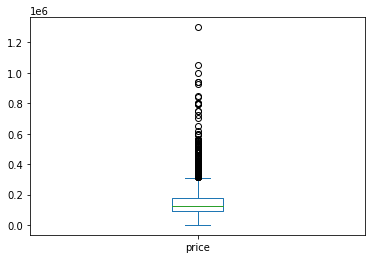

In [95]:
pr = pd.read_csv('prices.csv')
pr['price'].plot.box()

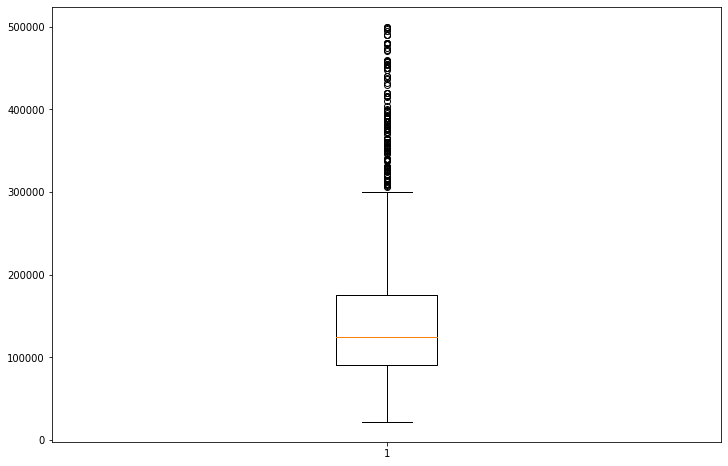

In [106]:
plt.figure(figsize=(12,8))
plt.boxplot(pr[(pr['price'] < 500000) & (pr['price'] > 10000)])

plt.show()
# pr.describe()

In [32]:
pr.value_counts()[:20]

0     
120000    61
130000    48
110000    47
115000    42
135000    41
150000    40
125000    37
85000     35
90000     34
175000    32
75000     30
105000    29
140000    29
190000    28
230000    28
100000    28
70000     28
250000    27
200000    25
160000    24
dtype: int64

In [622]:
'999,122 1221'.replace(u'\xa0', '').replace(u',', '')

'999122 1221'

In [563]:
len(ids)/30

8.666666666666666

0     50
1     98
2     54
3      6
4     34
      ..
95    31
96    38
97    24
98    25
99    24
Length: 100, dtype: int64


ValueError: `bins` must increase monotonically, when an array

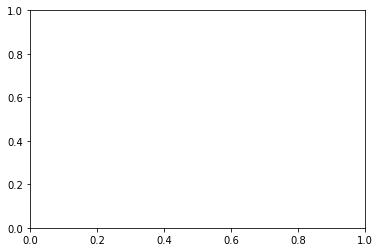

In [68]:
seed(0)
import matplotlib.pyplot as plt
n = []
for i in range(0,100):
    n.append(randint(1,100))
    
nn = pd.Series(n)
print(nn)
bins= pd.cut(nn, 5)
# bins = n3.bins()
plt.hist(nn, bins=bins, edgecolor="k")
plt.xticks(bins)

plt.show()
# n3

In [537]:
ap = soup.find_all("div", class_="listvip-item")[1]
id_app = ap.get('id').replace('adrows_','')
singe_ap = page = requests.get('https://alo.bg/'+id_app)

soup2 = BeautifulSoup(singe_ap.content, "html.parser")
par = soup2.find('div',class_="multi-value-row").find_all('span',class_="ads-params-multi")
for i in par:
    print(i.text)

Асансьор
Гараж/Паркомясто


### Find the total number of pages

In [420]:
pagination = soup.find_all("a", class_="disabled_")[1]
pages = int(pagination.text)
print(pages)

151


### Loop through all the pages and get the apparments
* Get proxies from a static page that is updated every 30 minutes with new proxies (it's a paid subscription)
* Save the proxy list to a text file
* Get files as a Series and used its ips for scrapping the pages

In [538]:
url_prox = "http://list.didsoft.com/get?email=plamenyankovtest@gmail.com&pass=kxegge&pid=http3000&showcountry=no"
res_proxies = requests.get(url_prox)
ips_raw = BeautifulSoup(res_proxies.content, "html.parser")
    
ips_file = open('ips.txt',"w") 
ips_file.writelines("ips\n")
for i in ips_raw.contents[0].split('\n'):
    ips_file.writelines("{}\n".format(i))    
ips_file.close() 

df_ips = pd.read_csv('ips.txt')
df_ips['ips'].head()   

0      185.77.221.67:8085
1     81.174.11.159:61743
2       77.83.85.246:8085
3      88.218.65.131:8085
4    168.138.177.148:3128
Name: ips, dtype: object

In [539]:
df_ips['ips'][randint(1,100)]


'188.133.139.31:10000'

In [431]:
appartments = []

for page in range(1,pages+1):
#     Get random proxy from ips list pages+1
    proxy = {
      "ip": df_ips['ips'][randint(1,len(df_ips['ips'])-1)]
    }
    
    str_page = str(page)
    url_page = URL+'&page='+ str_page
    alo_page = requests.get(url_page, proxies=proxy)
    alo_html = BeautifulSoup(alo_page.content, "html.parser")
#     ap_top_rows = alo_html.find_all("div", class_="listtop-item")
    ap_vip_rows = alo_html.find_all("div", class_="listvip-item")
    print(url_page,'Page: '+ str_page, len(ap_elements),len(ap_vip_elements))
    
    
#     if(len(ap_top_rows) > 0):
#         for indx,i in enumerate(ap_top_rows):
#             dic = {}
#             for indx2,j in enumerate(i.find_all('div',class_="ads-params-row")):
# #                 dic[GoogleTranslator(source='auto', target='en').translate(j.find('div',class_="ads-param-title").text)] = GoogleTranslator(source='auto', target='en').translate(j.find('span',class_="ads-params-single").text)
#                 dic[j.find('div',class_="ads-param-title").text] = j.find('span',class_="ads-params-single").text
#             appartments.append(dic)
            
            
    if(len(ap_vip_rows) > 0):            
        for i in ap_vip_rows:
            dic = {}
            dic['Title'] = i.find('h3',class_='listvip-item-title').text
            for j in i.find_all('span',class_="ads-params-multi"):
#                 dic[GoogleTranslator(source='auto', target='en').translate(j.get('title'))] = GoogleTranslator(source='auto', target='en').translate(j.text)
                dic[j.get('title')] = j.text
            appartments.append(dic)      

https://www.alo.bg/obiavi/imoti-prodajbi/apartamenti-stai/?region_id=22&location_ids=4342&page=1 Page: 1 0 30
https://www.alo.bg/obiavi/imoti-prodajbi/apartamenti-stai/?region_id=22&location_ids=4342&page=2 Page: 2 0 30
https://www.alo.bg/obiavi/imoti-prodajbi/apartamenti-stai/?region_id=22&location_ids=4342&page=3 Page: 3 0 30
https://www.alo.bg/obiavi/imoti-prodajbi/apartamenti-stai/?region_id=22&location_ids=4342&page=4 Page: 4 0 30
https://www.alo.bg/obiavi/imoti-prodajbi/apartamenti-stai/?region_id=22&location_ids=4342&page=5 Page: 5 0 30
https://www.alo.bg/obiavi/imoti-prodajbi/apartamenti-stai/?region_id=22&location_ids=4342&page=6 Page: 6 0 30
https://www.alo.bg/obiavi/imoti-prodajbi/apartamenti-stai/?region_id=22&location_ids=4342&page=7 Page: 7 0 30
https://www.alo.bg/obiavi/imoti-prodajbi/apartamenti-stai/?region_id=22&location_ids=4342&page=8 Page: 8 0 30
https://www.alo.bg/obiavi/imoti-prodajbi/apartamenti-stai/?region_id=22&location_ids=4342&page=9 Page: 9 0 30
https://ww

https://www.alo.bg/obiavi/imoti-prodajbi/apartamenti-stai/?region_id=22&location_ids=4342&page=75 Page: 75 0 30
https://www.alo.bg/obiavi/imoti-prodajbi/apartamenti-stai/?region_id=22&location_ids=4342&page=76 Page: 76 0 30
https://www.alo.bg/obiavi/imoti-prodajbi/apartamenti-stai/?region_id=22&location_ids=4342&page=77 Page: 77 0 30
https://www.alo.bg/obiavi/imoti-prodajbi/apartamenti-stai/?region_id=22&location_ids=4342&page=78 Page: 78 0 30
https://www.alo.bg/obiavi/imoti-prodajbi/apartamenti-stai/?region_id=22&location_ids=4342&page=79 Page: 79 0 30
https://www.alo.bg/obiavi/imoti-prodajbi/apartamenti-stai/?region_id=22&location_ids=4342&page=80 Page: 80 0 30
https://www.alo.bg/obiavi/imoti-prodajbi/apartamenti-stai/?region_id=22&location_ids=4342&page=81 Page: 81 0 30
https://www.alo.bg/obiavi/imoti-prodajbi/apartamenti-stai/?region_id=22&location_ids=4342&page=82 Page: 82 0 30
https://www.alo.bg/obiavi/imoti-prodajbi/apartamenti-stai/?region_id=22&location_ids=4342&page=83 Page: 

https://www.alo.bg/obiavi/imoti-prodajbi/apartamenti-stai/?region_id=22&location_ids=4342&page=148 Page: 148 0 30
https://www.alo.bg/obiavi/imoti-prodajbi/apartamenti-stai/?region_id=22&location_ids=4342&page=149 Page: 149 0 30
https://www.alo.bg/obiavi/imoti-prodajbi/apartamenti-stai/?region_id=22&location_ids=4342&page=150 Page: 150 0 30
https://www.alo.bg/obiavi/imoti-prodajbi/apartamenti-stai/?region_id=22&location_ids=4342&page=151 Page: 151 0 30


In [432]:
df = pd.DataFrame(appartments)
# df[(df['Вид на имота'] == 'Тристаен апартамент в София')&(df['Квадратура'] == '68 кв.м')][60:80]
df

,Title,Цена,Вид на имота,Квадратура,Вид строителство,Година на строителство,Номер на етажа,Етаж,Степен на завършеност
0,Двустаен апартамент обзаведен кв. Малинова долина,Цена: 89 900 EUR (1 605.36 EUR/кв.м),Двустаен апартамент в София,56 кв.м,Тухла,2020 г.,3 етаж,Непоследен,NaN
1,"Продавам 2-ст. апартамент в гр. София, Света Т...",Цена: 75 000 EUR (1 119.40 EUR/кв.м),Тристаен апартамент в София,67 кв.м,Тухла,2021 г.,4 етаж,Първи жилищен,NaN
2,Овча купен до НБУ напулно обзаведен,Цена: 79 000 EUR (951.81 EUR/кв.м),Двустаен апартамент в София,83 кв.м,Тухла,2020 г.,1 етаж,Първи жилищен,NaN
3,Продавам 2-ен в Овча купел1,Цена: 98 880 EUR (1 177.14 EUR/кв.м),Двустаен апартамент в София,84 кв.м,Тухла,2010 г.,7 етаж,Последен етаж,NaN
4,"Двустаен с Английски двор, кв. Витоша",Цена: 86 500 EUR (1 067.90 EUR/кв.м),Двустаен апартамент в София,81 кв.м,Тухла,2021 г.,NaN,Партер,NaN
...,...,...,...,...,...,...,...,...,...
4487,Многостаен апартамент 220 кв.м Тухла - нова Го...,Цена: 478 400 EUR (2 174.55 EUR/кв.м),Многостаен апартамент в София,220 кв.м,Тухла,NaN,15 етаж,Непоследен,NaN
4488,Елитен двустаен апартамент,Цена: 119 000 EUR (1 214.29 EUR/кв.м),Двустаен апартамент в София,98 кв.м,Тухла,NaN,4 етаж,NaN,NaN
4489,Елитен четиристаен апартамент,Цена: 325 650 EUR (1 318.42 EUR/кв.м),Многостаен апартамент в София,247 кв.м,Тухла,NaN,4 етаж,NaN,NaN
4490,Елитен тристаен апартамент,Цена: 179 100 EUR (1 218.37 EUR/кв.м),Тристаен апартамент в София,147 кв.м,Тухла,NaN,4 етаж,NaN,NaN


In [522]:
def findPrice(x):
    if type(x) == str:
        x = GoogleTranslator(source='auto', target='en').translate(x)
        xx = x.replace(' ','').replace(',','')
        if len(xx) > 3:
            r = re.findall(r'(\d+)', xx, re.UNICODE)
            print(r[0])
            return r[0]
#             return xx[1]
        else:
            print(xx,x)

p = df['Цена'].apply(findPrice)

89900
75000
79000
98880
86500
57000
200000
195000
120000
124000
158999
242000
96000
137900
173092
148800
175000
132000
800000
214000
101200
140000
195000
190000
134408
99990
256600
63000
299900
190000
128000
124000
180000
72000
104400
64800
125000
135000
200000


KeyboardInterrupt: 

In [517]:
# x1 = p[1]
# # xx1 = x1.replace(' EUR','')
# pattern = '(\d+)'
# r = re.findall(r'(\d+)', x1, re.UNICODE)
# print(r[0]+r[1],x1)


In [526]:
df2 = df['Вид на имота'].replace('Тристаен апартамент в София',3)
df2.value_counts()

3                                              1873
Двустаен апартамент в София                    1645
Многостаен апартамент в София                   534
Едностаен апартамент в София                    300
Мезонет                                         100
Ателие/Студио                                    15
Вид на имота: Тристаен апартамент в София         7
Таван                                             7
Вид на имота: Двустаен апартамент в София         6
Вид на имота: Многостаен апартамент в София       3
Вид на имота: Мезонет                             1
Вид на имота: Едностаен апартамент в София        1
Name: Вид на имота, dtype: int64

In [320]:
df[df['Цена'] == '300 EUR']

,Цена,Вид на имота,Квадратура,Вид строителство,Година на строителство,Етаж,Номер на етажа,Степен на завършеност


In [215]:
for indx,i in enumerate(ap_top_rows):
    dic = {}
    for indx2,j in enumerate(i.find_all('div',class_="ads-params-row")):
#         dic[GoogleTranslator(source='auto', target='en').translate(j.find('div',class_="ads-param-title").text)] = GoogleTranslator(source='auto', target='en').translate(j.find('span',class_="ads-params-single").text)
        print(j.find('div',class_="ads-param-title").text)
#     appartments.append(dic)

Цена:
Вид на имота:
Квадратура:
Вид строителство:
Номер на етажа:
Цена:
Вид на имота:
Квадратура:
Вид строителство:
Номер на етажа:
Цена:
Вид на имота:
Квадратура:
Вид строителство:
Номер на етажа:
Цена:
Вид на имота:
Квадратура:
Вид строителство:
Номер на етажа:
Цена:
Вид на имота:
Квадратура:
Вид строителство:
Номер на етажа:
Цена:
Вид на имота:
Квадратура:
Вид строителство:
Година на строителство:
Номер на етажа:
Етаж:
Цена:
Вид на имота:
Квадратура:
Вид строителство:
Номер на етажа:
Цена:
Вид на имота:
Квадратура:
Вид строителство:
Номер на етажа:
Цена:
Вид на имота:
Квадратура:
Вид строителство:
Година на строителство:
Номер на етажа:
Етаж:
Цена:
Вид на имота:
Квадратура:
Вид строителство:
Номер на етажа:
Цена:
Вид на имота:
Квадратура:
Вид строителство:
Номер на етажа:
Цена:
Вид на имота:
Квадратура:
Вид строителство:
Номер на етажа:
Цена:
Вид на имота:
Квадратура:
Вид строителство:
Номер на етажа:


In [196]:
for i in ap_vip_rows:
    for j in i.find_all('span',class_="ads-params-single"):
        print(GoogleTranslator(source='auto', target='en').translate(j.text))

In [71]:
len(apps)

14

In [72]:
df = pd.DataFrame(apps)
df.head()

,Price:,Property type:,Area:,Type of construction:,Year of construction:,Floor number:,Floor:
0,"113,999 EUR (1,239.12 EUR / sq.m)",Two-bedroom apartment in Sofia,92 sq.m,Panel,1978 year,6th floor,Not the last
1,"412,000 EUR (1,979.44 EUR / sq.m)",Large apartment in Sofia,208.14 sq.m.,Brick,NaN,6th floor,NaN
2,"273,000 EUR (1,996.78 EUR / sq.m)",Two-bedroom apartment in Sofia,136.72 sq.m.,Brick,NaN,6th floor,NaN
3,"79,500 EUR (1,204.55 EUR / sq.m)",One bedroom apartment in Sofia,66 sq.m,Panel,1970 year,2nd floor,Not the last
4,"117,188 EUR (1,250 EUR / sq.m)",Two-bedroom apartment in Sofia,93.75 sq.m.,Brick,NaN,6th floor,NaN


In [73]:
# for i in ap_vip_elements:
#     for j in i.find_all('span',class_="ads-params-multi"):
#         print(j.text)

In [198]:
apps_vip = []
for indx,i in enumerate(ap_vip_rows):
    dic = {}
    for indx2,j in enumerate(i.find_all('span',class_="ads-params-multi")):
        dic[GoogleTranslator(source='auto', target='en').translate(j.get('title'))] = GoogleTranslator(source='auto', target='en').translate(j.text)
    apps_vip.append(dic)

In [199]:
apps_vip

[{'Price': 'Price: 67 800 EUR (721.28 EUR / sq.m)',
  'Type of property': 'One bedroom apartment in Sofia',
  'Area': '94 sq.m',
  'Type of construction': 'Brick',
  'Year of construction': '2021',
  'Floor': 'Ground floor'},
 {'Price': 'Price: 65 900 EUR (890.54 EUR / sq.m)',
  'Type of property': 'One bedroom apartment in Sofia',
  'Area': '74 sq.m',
  'Type of construction': 'Brick',
  'Year of construction': '2020 g.',
  'Floor number': '2nd floor',
  'Floor': 'Not the last',
  'Level of completion': 'Under construction'},
 {'Price': 'Price: 64,999 EUR (999.98 EUR / sq.m)',
  'Type of property': 'One bedroom apartment in Sofia',
  'Area': '65 sq.m',
  'Type of construction': 'Brick',
  'Year of construction': '2021',
  'Floor number': '4th floor',
  'Floor': 'Last floor'},
 {'Price': 'Price: 65,000 EUR (984.85 EUR / sq.m)',
  'Type of property': 'One bedroom apartment in Sofia',
  'Area': '66 sq.m',
  'Type of construction': 'Brick',
  'Year of construction': '2023 r.',
  'Floor': 

In [75]:
df2 = pd.DataFrame(apps_vip)
df2.head()

,Price,Type of property,Area,Type of construction,Year of construction,Floor number,Floor,Level of completion
0,"Price: 158,999 EUR (1,186.56 EUR / sq.m)",Large apartment in Sofia,134 sq.m,Brick,1940 g.,2nd floor,First residential,NaN
1,"Price: 101,200 EUR (1,367.57 EUR / sq.m)",One bedroom apartment in Sofia,74 sq.m,Brick,2021,5th floor,Not the last,Under construction
2,"Price: 115,000 EUR (1,045.45 EUR / sq.m)",Two-bedroom apartment in Sofia,110 sq.m,ECOC / PC,1996 year,3rd floor,Not the last,NaN
3,"Price: 110,000 EUR (1,718.75 EUR / sq.m)",One bedroom apartment in Sofia,64 sq.m,Brick,2021,3rd floor,Not the last,NaN
4,"Price: 140,000 EUR (1,944.44 EUR / sq.m)",One bedroom apartment in Sofia,72 sq.m,Brick,2005 year,5th floor,Not the last,NaN


In [76]:
columns = df.columns.map(lambda x: x.replace(':',''))

In [77]:
columns

Index(['Price', 'Property type', 'Area', 'Type of construction',
       'Year of construction', 'Floor number', 'Floor'],
      dtype='object')

In [78]:
columns_map = {}
for idx,i in enumerate(df.columns):
    columns_map[i] = df2.columns[idx]

In [79]:
columns_map

{'Price:': 'Price',
 'Property type:': 'Type of property',
 'Area:': 'Area',
 'Type of construction:': 'Type of construction',
 'Year of construction:': 'Year of construction',
 'Floor number:': 'Floor number',
 'Floor:': 'Floor'}

In [80]:
df.rename(columns=columns_map,inplace=True)
df.columns

Index(['Price', 'Type of property', 'Area', 'Type of construction',
       'Year of construction', 'Floor number', 'Floor'],
      dtype='object')

In [88]:
df3 = df.append(df2, ignore_index=True)
df3.shape

(30, 8)

In [89]:
df3['Price'] = df3['Price'].apply(lambda x: x.replace('Price: ',''))
.apply(lambda x: x.replace(' ','')).apply(lambda x: x.replace('.',''))
.apply(lambda x: x.replace(',','')).apply(lambda x: re.search(r'(\d+)EUR', x)[0])
.apply(lambda x: x.replace('EUR',''))
df3.head()

,Price,Type of property,Area,Type of construction,Year of construction,Floor number,Floor,Level of completion
0,113999,Two-bedroom apartment in Sofia,92 sq.m,Panel,1978 year,6th floor,Not the last,NaN
1,412000,Large apartment in Sofia,208.14 sq.m.,Brick,NaN,6th floor,NaN,NaN
2,273000,Two-bedroom apartment in Sofia,136.72 sq.m.,Brick,NaN,6th floor,NaN,NaN
3,79500,One bedroom apartment in Sofia,66 sq.m,Panel,1970 year,2nd floor,Not the last,NaN
4,117188,Two-bedroom apartment in Sofia,93.75 sq.m.,Brick,NaN,6th floor,NaN,NaN


In [104]:

m = re.search(r'(\d+)EUR', '124000EUR(190769EUR/sqm)')
m[0]

'124000EUR'

In [109]:
df3 = df3.astype({"Price": int})
df3[['Price']].describe()

,Price
count,30.000000
mean,179948.366667
std,127370.275210
min,63000.000000
25%,97507.500000
50%,134609.000000
75%,239950.000000
max,670000.000000
